## Observations and Insights 

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()
# Observations:
# 1. Ketapril and Naftisol have higher median tumor volume, higher average tumor volume, and higher tumor volume variance
# than the placebo. I would not recommend those drug for someone who didn't want larger tumors.
# 2. Capomulin and Ramicane have the highest number of mice treated so I would expect smaller variance
# in their results due to the higher sample size. Checking the summary statistics, that appears to be the case.
# 3.Infubinol had the largest final tumor volume compared to Capomulin, Ramicane, and, Ceftamin according to the box and whisker plot.
# This is further confirmed in the summary stats. There's also a higher standard deviation with Infubinol which explains why the whiskers are slightly
# longer, showing that there are some outliers in the data.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [143]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


# Combine the above data into a single dataset


In [4]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

In [5]:
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

# Remove Duplicate:
* Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first"), "Mouse ID"].unique()
dup_mice


array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
#Duplicate Needs to be displayed
dup_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first")]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
num_mice2 = clean_df["Mouse ID"].nunique()
num_mice2

249

## Summary Statistics

* Use the cleaned data for the remaining steps.

* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean,
mean_tumor_volume = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
#median,
median_tumor_volume = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
#variance,
variance_tumor_volume = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
#standard deviation,
std_tumor_volume = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
#SEM 
sem_tumor_volume = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [11]:
# Assemble the stat summary resulting series into a single summary dataframe.

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume, 
                            "Median Tumor Volume":median_tumor_volume, 
                           "Tumor Volume Variance":variance_tumor_volume, 
                           "Tumor Volume Std. Dev.":std_tumor_volume, 
                           "Tumor Volume Std. Err.":sem_tumor_volume})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts
* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows  the number of total mice for each treatment regimen throughout the course of the study.

  * **NOTE:** These plots should look identical.


In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#Creating Groupby object for graphs
mice_count = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_count = mice_count.sort_values(ascending=False)
mice_count = mice_count.reindex()

<AxesSubplot:title={'center':'Number of Mice Tested Per Treatment'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

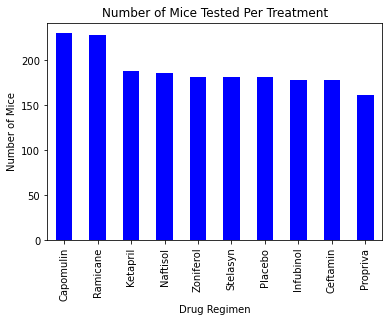

In [14]:
#Pandas bar chart
bar_df = mice_count.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested Per Treatment")
#bar_plot = drugs.plot(kind="bar", title="Number of Mice Tested Per Drug Regimen")
bar_df

<function matplotlib.pyplot.show(close=None, block=None)>

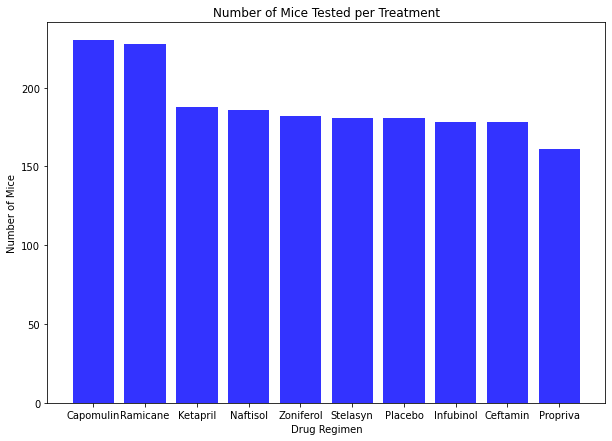

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Matplotlib chart using groupby object
x_axis = mice_count.index.values
y_axis = mice_count.values
fig1, ax1 = plt.subplots(figsize=(10, 7))
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show

<AxesSubplot:title={'center':'Distribution of Female vs Male mice'}, ylabel='Mouse ID'>

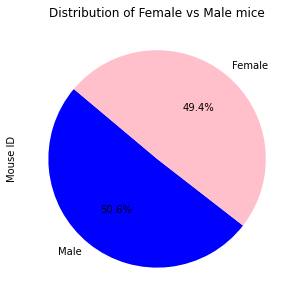

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_df.groupby(["Sex"]).count()["Mouse ID"]
mice_gender = mice_gender.sort_values(ascending=False)
mice_gender = mice_gender.reindex()

pcolors = ['blue', 'pink']
pie_df = mice_gender.plot.pie(y = 'Sex', figsize =(5,5), colors = pcolors, autopct="%1.1f%%", startangle=140)

plt.title("Distribution of Female vs Male mice")

pie_df

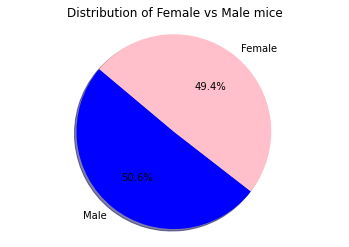

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Tell matplotlib to create a pie chart based upon the above data
colors = ("blue", "pink")
genders = ["Male","Female"]

plt.pie(mice_gender, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of Female vs Male mice")
# Save an image of our chart and print the final product to the screen
plt.show()

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_timepoint = greatest_timepoint.merge(clean_df, on= ["Mouse ID", "Timepoint"], how= "left")


In [135]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
   # Locate the rows which contain mice on each drug and get the tumor volumes

for drugs in treatment_list:
    final_tumor =merge_timepoint.loc[merge_timepoint["Drug Regimen"]==drugs,'Tumor Volume (mm3)']
    final_tumor_vol.append(final_tumor)
    
     # Determine outliers using upper and lower bounds
        
        
quartiles = final_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


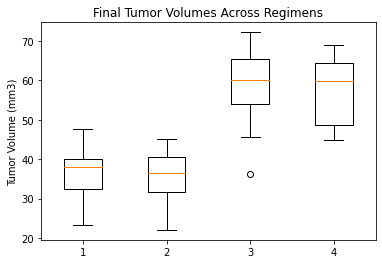

In [136]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes Across Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(final_tumor_vol)
plt.show()

## Line and Scatter Plots

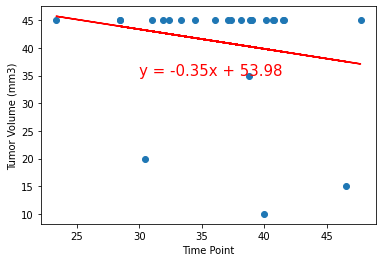

In [146]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_volume = merge_timepoint.loc[merge_timepoint["Drug Regimen"]=='Capomulin','Tumor Volume (mm3)']
capomulin_timepoint = merge_timepoint.loc[merge_timepoint["Drug Regimen"]=='Capomulin','Timepoint']
x_values = capomulin_volume
y_values = capomulin_timepoint

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,35),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


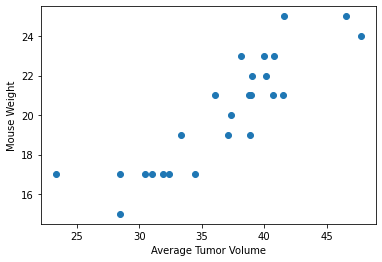

In [164]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_avg_volume = merge_timepoint.loc[merge_timepoint["Drug Regimen"]=='Capomulin','Tumor Volume (mm3)']
capomulin_weight = merge_timepoint.loc[merge_timepoint["Drug Regimen"]=='Capomulin','Weight (g)']
x_tumor = capomulin_avg_volume
y_weight = capomulin_weight

plt.scatter(x_tumor,y_weight)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.show()

## Correlation and Regression

The r-squared is: 0.7686134812139006


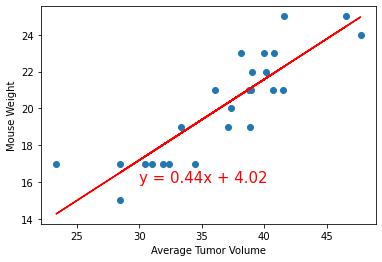

In [166]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_tumor, y_weight)
regress_values2 = x_tumor * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_tumor,regress_values2,"r-")
plt.annotate(line_eq2,(30,16),fontsize=15,color="red")
plt.scatter(x_tumor,y_weight)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
print(f"The r-squared is: {rvalue**2}")
plt.show()